# Model selection, training data and test data

Given data $(x_1, y_1), \ldots, (x_n,y_n)$, we have seen that linear regression can be used to fit a model of the form

\begin{equation}
f(x) = \beta_0 + \beta_1 g_1(x) + \ldots + \beta_k g_k(x)
\end{equation}

for any functions $g_1, \ldots, g_k$. Increasing $k$ increases the complexity of the model and improves the fit (decreases the SSE). For example, the SSE for the quadratic model can be no larger than that of a linear model, and is generally strictly smaller (as we saw in the first notebook). Should we keep increasing $k$ as long as the SSE keeps decreasing?  In fact, with $n$ data points, we can get _exactly_ zero SSE with an $(n-1)$th order polynomial fit! 

Is it a good idea to do this? Generally not. The point of a model is to make good predictions on _new_ data, not just on the already avaialable data $(x_1, y_1), \ldots, (x_n,y_n)$. That is, for a new $(x',y')$, how well does the model prediction $f(x')$ match with $y'$?

One sensible approach is to fit the model only using part of the data, say 70-80% of the data points -- these are called the _training_ data.  The remaining data points can be used to test the fitted model --  these are called the _test data_ or _hold out data_ . For a good model, we expect that the mean-squared error (or $R^2$ coefficient) on the test data should not be too much higher than on the training data. 

Let's look at an example. 

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import math
import numpy as np

training_data = np.load('Data/example_training_data.npy')
# If you are running on Google Colab, change the path to '/content/drive/MyDrive/IB-Data-Science/Data/example_training_data.npy'

print(np.shape(training_data))

(100, 2)


The training data consists of 100 data points. The first column of the array contains the $x$ values and the second column the corresponding $y$ values. Let us plot these in a scatter plot.

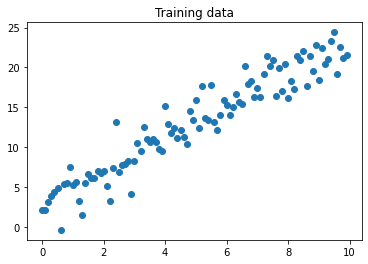

In [3]:
import matplotlib.pyplot as plt

xtrain = training_data[:,0] #first column has the x-values
ytrain = training_data[:,1] #second column has the y-values
plt.scatter(xtrain, ytrain)
plt.title('Training data')
plt.show()
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20

### Fitting a linear model

Let us fit a linear model $f(x) = \beta_0 + \beta_1 x$ to these data. 

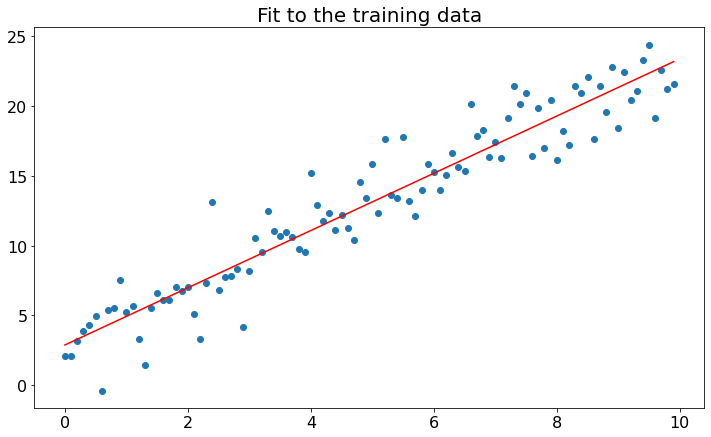

In [4]:
# form the X-transpose matrix and then the X matrix
all_ones = np.ones(np.size(xtrain))
X = np.column_stack((all_ones, xtrain))
XT = X.T

# Compute the least-squares coefficients for the linear model
beta_lin = np.linalg.inv(XT.dot(X)).dot(XT.dot(ytrain))

# Compute the fit of the model
fit_lin = X.dot(beta_lin)

plt.scatter(xtrain, ytrain)
# plot the straight line fit
plt.plot(xtrain, fit_lin, color = 'red')
plt.title('Fit to the training data')
plt.show()

We now compute the _training_ error, which is the average MSE of the fit with respect to the training data. 

In [5]:
MSE_lin_train = np.linalg.norm(ytrain - fit_lin)**2/(np.size(ytrain))
print('MSE of linear model on training data: ', MSE_lin_train)

MSE of linear model on training data:  3.5642030628109196


Let us now load the test data. The test data consists of 40 new $(x,y)$ pairs 

(40, 2)


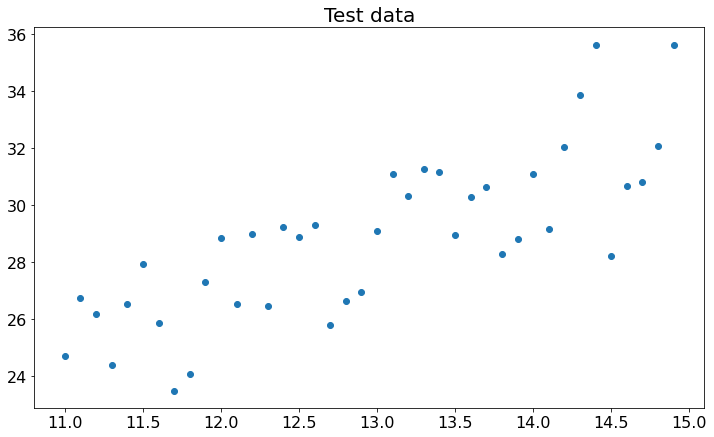

In [6]:
test_data = np.load('Data/example_test_data.npy')
# If you are running on Google Colab, change the path to '/content/gdrive/MyDrive/IB-Data-Science/Data/example_test_data.npy'


print(np.shape(test_data))

xtest = test_data[:,0] #first column contains the x-values of the test data
ytest = test_data[:,1]
plt.scatter(xtest, ytest)
plt.title('Test data')
plt.show()

We now compute the fit of the linear model for the test data, plot it, and compute the SSE for the test data.  We emphasize that the model has fit using only the training data, so the test data provides a way to validate the model. 

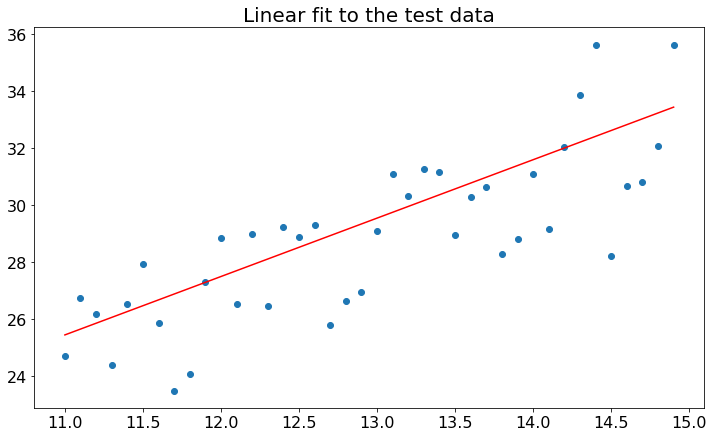

MSE of linear model on test data:  3.3996


In [7]:
#Compute the fit of the linear model: \beta_0 + \beta_1 x

test_ones = np.ones(np.shape(xtest))
fit_lin_test = beta_lin[0]*test_ones + beta_lin[1]*xtest

#Plot the fit together with scatter plot of test data
plt.scatter(xtest, ytest)
plt.plot(xtest, fit_lin_test, 'r')
plt.title('Linear fit to the test data')
plt.show()

#Compute MSE on the test data
MSE_lin_test = np.linalg.norm(ytest - fit_lin_test)**2/(np.size(ytest))
print('MSE of linear model on test data: ', np.round(MSE_lin_test, decimals =4))


### Fitting a quadratic model

We now fit a quadratic model $f(x) = \beta_0 + \beta_1 x + \beta_2 x^2$ to the training data, and then test the fit on the test data

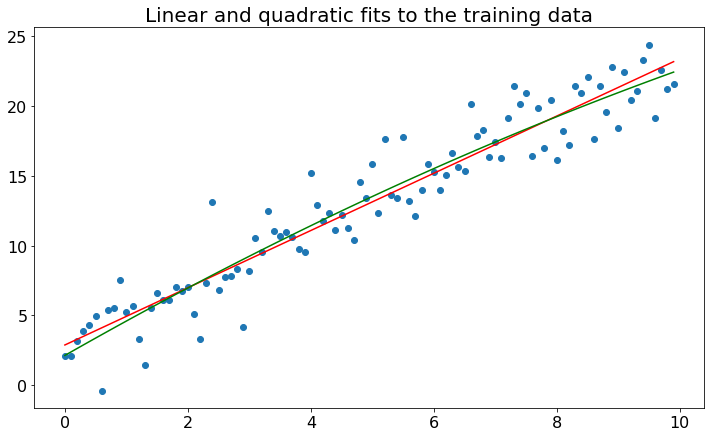

In [8]:
# form the X-transpose matrix and then the X matrix
all_ones = np.ones(np.size(xtrain))
X = np.column_stack((all_ones, xtrain, xtrain**2))
XT = X.T

# Compute the least-squares coefficients for the quadratic model
beta_quad = np.linalg.inv(XT.dot(X)).dot(XT.dot(ytrain))

# Compute the fit of the model
fit_quad = X.dot(beta_quad)

#scatterplot of data
plt.scatter(xtrain, ytrain)

# plot the straight line (red) and the quadratic fit (green)
plt.plot(xtrain, fit_lin, 'r')
plt.plot(xtrain, fit_quad, 'g')
plt.title('Linear and quadratic fits to the training data')
plt.show()

We now compute the training error of the quadratic fit. 

In [9]:
MSE_quad_train = np.linalg.norm(ytrain - fit_quad)**2/(np.size(ytrain))
print('MSE of quadratic model on training data: ', np.round(MSE_quad_train, decimals =4))
print('MSE of linear model on training data: ', np.round(MSE_lin_train, decimals =4))

MSE of quadratic model on training data:  3.4452
MSE of linear model on training data:  3.5642


As expected, the quadratic model gives a lower MSE on the training data. But let us now use the test data to examine whether it is worth fitting a quadratic model.

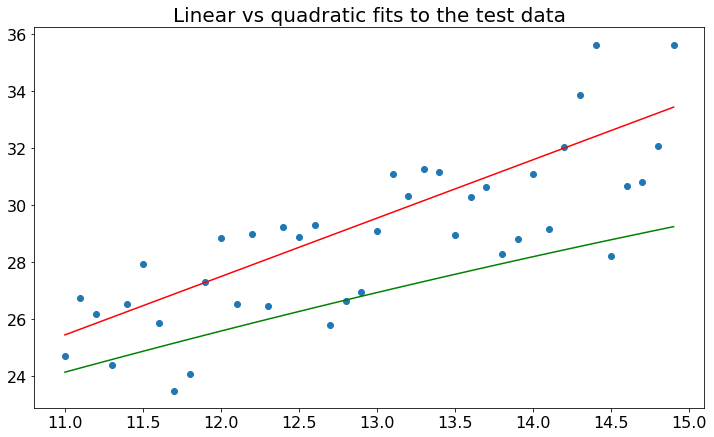

MSE of quadratic model on test data:  7.7583
MSE of linear model on test data:  3.3996


In [10]:
#Compute the fit of the quadratic model on test data

test_ones = np.ones(np.shape(xtest))
fit_quad_test = beta_quad[0]*test_ones + beta_quad[1]*xtest + beta_quad[2]*(xtest**2)

#Plot the fits together with scatter plot of test data
plt.scatter(xtest, ytest)
plt.plot(xtest, fit_quad_test, 'g')
plt.plot(xtest, fit_lin_test, 'r')
plt.title('Linear vs quadratic fits to the test data')
plt.show()

#Compute MSE on the test data
MSE_quad_test = np.linalg.norm(ytest - fit_quad_test)**2/(np.size(ytest))
print('MSE of quadratic model on test data: ', np.round(MSE_quad_test, decimals =4))
print('MSE of linear model on test data: ', np.round(MSE_lin_test, decimals =4))


We see that the quadratic model is a much worse fit on the test data, having more than twice the MSE of the linear model. Therefore, there is no justification to choose the quadratic model, and we stick with the simpler linear model.  

In this case, the quadratic model _overfits_ the training data, leading to poor performance for the test data. 
Unless the test MSE of the quadratic model is significantly lower than that of the linear model, we might prefer to stick with the linear model. 

# Linear vs quadratic fit for CO$_2$ data (optional exercise)

Fit a model with first 70-80% of the rows as training data, with the rest being test data.

# Summary

-  We used a simple approach for model selection: divide your available data into "training data" and "test data" (say, in 70:30 proportion). Fit your model to the training data, and check its performance on the test data. 
-  For a good model, the performance on the training and test data must be similar.  

- We only considered one partition of the data into training and test sets. Clearly, there are many ways we can split the data into training and test sets. Averaging the test MSE over all these splits would give a more robust estimate of the test error. This procedure is called _cross-validation_. (See references below.)

- In some situations we may not have enough data points available to set aside a portion of them as test data, i.e., we may want to make use of all the available data to fit a decent model. There is a variety of more sophisticated methods and metrics that can be used for model selection in such cases. Subset selection, and Forward/Backward-stepwise selection are some examples.  If you are interested in learning more, have a look at the references below.

# References

1. _Introduction to Statistical Learning_ , by G. James, D. Witten, T. Hastie, R. Tibshirani. A free downloadable copy of the book is available [here](http://faculty.marshall.usc.edu/gareth-james/ISL/).  Chapters 5,6 discuss model selection. (Also read Chapter 2.2 for background.)
1. _Elements of Statistical Learning_ , by T. Hastie, R. Tibshirani, J. Friedman. Free downloadable copy available [here](https://web.stanford.edu/~hastie/ElemStatLearn/). This book covers similar topics as the above but with more mathematical detail and rigour. Chapter 7 discusses model selection.